## **Are You Ready?**
Dalam proyek ini, Anda akan diminta untuk melakukan eksplorasi dan analisis mengenai COVID-19 di Indonesia. Data yang Anda pergunakan diambil langsung dari API (Application Programming Interface) yang tersedia di covid19.go.id. Sehingga dalam proyek ini Anda akan mempelajari teknik mengambil data dari API, teknik mempersiapkan data, serta analisis dan visualisasi data.

Apakah Anda siap untuk mengerjakan proyek analisis data ini? Jawablah dengan mengetikkan True apabila Anda siap atau False jika Anda belum siap karena belum mencuci tangan.

In [ ]:
True

True

## **Mengakses API covid19.go.id**

Rekapitulasi data COVID-19 Indonesia tersedia dalam API publik yang beralamat di https://storage.googleapis.com/dqlab-dataset/update.json.

Salah satu cara untuk mengakses API adalah dengan menggunakan fungsi get() dari library requests.

Sekarang aktifkanlah library requests dan jalankan fungsi get() pada alamat API yang telah disebutkan! Simpan hasil fungsi tersebut dalam obyek bernama resp.

In [ ]:
import requests
resp = requests.get('https://storage.googleapis.com/dqlab-dataset/update.json', verify=False)

/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


## **Mengevaluasi Respon**
Saat Anda menjalankan fungsi get(), pada dasarnya hal yang terjadi adalah Anda membuat sebuah permintaan kepada server penyedia API. Permintaan Anda tersebut selanjutnya diproses dan dijawab oleh server sebagai sebuah respon. Objek resp yang telah Anda buat memiliki informasi respon oleh server.

Ada tiga informasi utama dalam sebuah respon API, yaitu status, headers, dan body. Status memiliki informasi apakah permintaan Anda berhasil atau tidak dan dinyatakan dalam status code, headers umumnya mengandung informasi metadata, sedangkan body berisikan konten atas permintaan yang telah dibuat.

Status Code

Ada beberapa jenis status code yang umumnya dijumpai, antara lain:

200. Artinya permintaan sukses dipenuhi.
404. Artinya berkas yang diminta tidak dapat ditemukan.
500. Artinya akses permintaan ditolak.
501. Artinya terjadi kesalahan pada server.
Informasi lengkap mengenai jenis-jenis status code dapat Anda pelajari di https://restfulapi.net/http-status-codes/

Anda dapat mencetak resp secara langsung yang telah memberikan output status atas permintaan Anda melalui API. Sekarang coba lihatlah status atas permintaan yang telah Anda buat! Apakah permintaan Anda berhasil?

In [ ]:
import requests
resp = requests.get('https://storage.googleapis.com/dqlab-dataset/update.json', verify=False)
print(resp)

<Response [200]>


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


## **Headers API**

Selamat status permintaan Anda melalui API sukses dipenuhi! Sekarang cobalah Anda jalankan attribut headers pada resp untuk mengetahui metadata apa saja yang tersimpan. Tampilkan dengan menggunakan fungsi print. 

Apakah isi dari elemen content-type?

Kapan terakhir kali informasi diperbaharui?

In [ ]:
import requests
resp = requests.get('https://storage.googleapis.com/dqlab-dataset/update.json', verify=False)
print(resp.headers)

{'X-GUploader-UploadID': 'ADPycdswAphAWlhT1EJ6uEwIY7FyFA-8PY-Vs16QIcu3bHUO08qpXcWQpD-9YhdGpeE-FAptVoflzMY5DWZQPv1zqYKL3BYJ4ykY', 'x-goog-generation': '1654513959565478', 'x-goog-metageneration': '1', 'x-goog-stored-content-encoding': 'identity', 'x-goog-stored-content-length': '311897', 'x-goog-hash': 'crc32c=GMMqEA==, md5=8aR/820+lfYyWNlv5bLUOQ==', 'x-goog-storage-class': 'STANDARD', 'Accept-Ranges': 'bytes', 'Content-Length': '311897', 'Server': 'UploadServer', 'Date': 'Sun, 23 Oct 2022 03:45:43 GMT', 'Expires': 'Sun, 23 Oct 2022 04:45:43 GMT', 'Cache-Control': 'public, max-age=3600', 'Last-Modified': 'Mon, 06 Jun 2022 11:12:39 GMT', 'ETag': '"f1a47ff36d3e95f63258d96fe5b2d439"', 'Content-Type': 'application/json', 'Age': '236'}


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


## **Mengekstrak Isi Respon**

Respon API dengan status code 200 menyatakan bahwa permintaan Anda berhasil dipenuhi dan konten yang diminta tersedia untuk diekstrak. Selain itu Anda juga telah mengetahui lewat attribut headers bahwa konten yang diminta tersedia dalam bentuk application/json, yaitu berkas JSON.

Selanjutnya Anda dapat mengekstrak konten tersebut dengan menggunakan method json(). Method json() merupakan builtin JSON decoder untuk mengekstrak content bertipe JSON. Anda juga dapat menggunakan attribut content tetapi ini berupa binary content yang perlu Anda proses kembali nantinya. Jalankan method json() pada obyek resp dan simpanlah hasilnya sebagai cov_id_raw!

cov_id_raw ini bertipe data dict.

In [ ]:
import requests
resp = requests.get('https://storage.googleapis.com/dqlab-dataset/update.json', verify=False)

cov_id_raw = resp.json()

/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


## **Mengekstrak isi Respon - 2**

Dengan menggunakan fungsi len() dan method keys() cobalah amati ada berapa komponen serta apa saja nama komponen dalam obyek cov_id_raw tersebut! Kemudian ekstraklah key ke-2 dan simpan dengan nama cov_id_update.

In [ ]:
import requests
resp = requests.get('https://storage.googleapis.com/dqlab-dataset/update.json', verify=False)
cov_id_raw = resp.json()

print('Length of cov_id_raw : %d.' %len(cov_id_raw))
print('Komponen cov_id_raw  : %s.' %cov_id_raw.keys())
cov_id_update = cov_id_raw['update']

Length of cov_id_raw : 2.
Komponen cov_id_raw  : dict_keys(['data', 'update']).


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


## **Analisa Data**

Sekarang Anda diminta untuk fokus pada obyek cov_id_update untuk menjawab pertanyaan-pertanyaan berikut:

* Kapan tanggal pembaharuan data penambahan kasus?
* Berapa jumlah penambahan kasus sembuh?
* Berapa jumlah penambahan kasus meninggal?
* Berapa jumlah total kasus positif hingga saat ini?
* Berapa jumlah total kasus meninggal hingga saat ini?

In [ ]:
import requests
resp = requests.get('https://storage.googleapis.com/dqlab-dataset/update.json', verify=False)
cov_id_raw = resp.json()
cov_id_update = cov_id_raw['update']

print('Tanggal pembaharuan data penambahan kasus   :', cov_id_update['penambahan']['tanggal'])
print('Jumlah penambahan kasus sembuh :', cov_id_update['penambahan']['jumlah_sembuh'])
print('Jumlah penambahan kasus meninggal :', cov_id_update['penambahan']['jumlah_meninggal'])
print('Jumlah total kasus positif hingga saat ini :', cov_id_update['total']['jumlah_positif'])
print('Jumlah total kasus meninggal hingga saat ini:', cov_id_update['total']['jumlah_meninggal'])

Tanggal pembaharuan data penambahan kasus   : 2022-05-14
Jumlah penambahan kasus sembuh : 416
Jumlah penambahan kasus meninggal : 5
Jumlah total kasus positif hingga saat ini : 6050519
Jumlah total kasus meninggal hingga saat ini: 156453


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


## **Apa Kabar Jawa Barat?**

Anda telah berhasil menjawab pertanyaan mengenai kondisi COVID-19 di Indonesia dengan menggunakan data yang langsung diambil menggunakan API. Namun bagaimana jika Anda ingin berfokus dengan data COVID-19 di provinsi tempat menetap saat ini?

covid19.go.id menyediakan data kasus COVID-19 tingkat provinsi di alamat API yang berbeda. Sebagai data mengenai COVID-19 Jawa Barat, tempat tinggal saya sekarang, tersedia di https://storage.googleapis.com/dqlab-dataset/prov_detail_JAWA_BARAT.json.

In [ ]:
import requests
resp_jabar = requests.get('https://storage.googleapis.com/dqlab-dataset/prov_detail_JAWA_BARAT.json', verify=False)
cov_jabar_raw = resp_jabar.json()

/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


## **Memahami Kasus COVID-19 di Jawa Barat**

Sekarang jalankanlah method keys() pada cov_jabar_raw tersebut untuk mengetahui nama-nama elemen utama yang tersedia dan jawablah pertanyaan berikut:

* Berapa jumlah total kasus COVID-19 di Jawa Barat?
* Berapa persentase kematian akibat COVID-19 di Jawa Barat?
* Berapa persentase tingkat kesembuhan dari COVID-19 di Jawa Barat?

In [ ]:
import requests
resp_jabar = requests.get('https://storage.googleapis.com/dqlab-dataset/prov_detail_JAWA_BARAT.json', verify=False)
cov_jabar_raw = resp_jabar.json()

print('Nama-nama elemen utama:\n', cov_jabar_raw.keys())
print('\nJumlah total kasus COVID-19 di Jawa Barat                 : %d' %cov_jabar_raw['kasus_total'])
print('Persentase kematian akibat COVID-19 di Jawa Barat         : %f.2%%' %cov_jabar_raw['meninggal_persen'])
print('Persentase tingkat kesembuhan dari COVID-19 di Jawa Barat : %f.2%%' %cov_jabar_raw['sembuh_persen'])

Nama-nama elemen utama:
 dict_keys(['last_date', 'provinsi', 'kasus_total', 'kasus_tanpa_tgl', 'kasus_dengan_tgl', 'meninggal_persen', 'meninggal_tanpa_tgl', 'meninggal_dengan_tgl', 'sembuh_persen', 'sembuh_tanpa_tgl', 'sembuh_dengan_tgl', 'list_perkembangan', 'data'])

Jumlah total kasus COVID-19 di Jawa Barat                 : 1105134
Persentase kematian akibat COVID-19 di Jawa Barat         : 1.425619.2%
Persentase tingkat kesembuhan dari COVID-19 di Jawa Barat : 98.282380.2%


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


## **Memperoleh Informasi yang Lebih Lengkap**

Informasi umum mengenai COVID-19 di Jawa Barat telah Anda dapatkan. Namun informasi akan lebih lengkap jika Anda memiliki data perkembangan COVID-19 dari waktu ke waktu, apakah Anda setuju?

Kabar baiknya adalah informasi tersebut juga disediakan oleh covid19.go.id melalui permintaan API yang telah Anda buat sebelumnya (atau https://storage.googleapis.com/dqlab-dataset/prov_detail_JAWA_BARAT.json). Data historis perkembangan COVID-19 tersebut tersimpan dengan nama list_perkembangan. Silakan Anda ekstrak data tersebut dari cov_jabar_raw dan untuk lebih memudahkan dalam menginspeksi data ubahlah data bertipe dict ke pandas dataframe. Kemudian simpanlah hasilnya sebagai obyek bernama cov_jabar! Amati struktur cov_jabar menggunakan method info() dan head().

In [ ]:
import numpy as np
import pandas as pd
import requests
resp_jabar = requests.get('https://storage.googleapis.com/dqlab-dataset/prov_detail_JAWA_BARAT.json', verify=False)
cov_jabar_raw = resp_jabar.json()

cov_jabar = pd.DataFrame(cov_jabar_raw['list_perkembangan'])
print('Info cov_jabar:\n', cov_jabar.info())
print('\nLima data teratas cov_jabar:\n', cov_jabar.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 785 entries, 0 to 784
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   tanggal                       785 non-null    int64
 1   KASUS                         785 non-null    int64
 2   MENINGGAL                     785 non-null    int64
 3   SEMBUH                        785 non-null    int64
 4   DIRAWAT_OR_ISOLASI            785 non-null    int64
 5   AKUMULASI_KASUS               785 non-null    int64
 6   AKUMULASI_SEMBUH              785 non-null    int64
 7   AKUMULASI_MENINGGAL           785 non-null    int64
 8   AKUMULASI_DIRAWAT_OR_ISOLASI  785 non-null    int64
dtypes: int64(9)
memory usage: 55.3 KB
Info cov_jabar:
 None

Lima data teratas cov_jabar:
          tanggal  KASUS  MENINGGAL  SEMBUH  DIRAWAT_OR_ISOLASI  \
0  1583193600000      1          1       0                   0   
1  1583280000000      1          0       0   

/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


## **Menjinakkan Data**

Setelah mengekstrak dan mengamati cov_jabar, Anda menemukan beberapa kejanggalan pada data tersebut. Diantaranya adalah kejanggalan data pada kolom tanggal dan format penulisan kolom yang tidak konsisten. Sekarang Anda akan mencoba melakukan beberapa tahapan untuk menjinakan data tersebut sehingga dapat diolah dan dianalisis dengan lebih mudah.

Ada beberapa tahapan yang akan Anda lakukan untuk menjinakan data cov_jabar, yaitu:

* Menghapus kolom DIRAWAT_OR_ISOLASI dan semua kolom yang berisi nilai kumulatif
* Merubah format penulisan semua kolom menjadi huruf kecil
* Mengganti nama kolom kasus menjadi kasus_baru
* Memperbaiki tipe data pada kolom tanggal menggunakan pd.to_datetime

Lengkapilah baris kode berikut untuk melakukan menjinakan data sesuai dengan tahapan yang telah Anda rencanakan! Anda akan menggunakan teknik chaining pada dataframe. Simpan hasil pengolahan Anda dengan nama cov_jabar_tidy.

In [ ]:
import numpy as np
import pandas as pd
import requests
resp_jabar = requests.get('https://storage.googleapis.com/dqlab-dataset/prov_detail_JAWA_BARAT.json', verify=False)
cov_jabar_raw = resp_jabar.json()
cov_jabar = pd.DataFrame(cov_jabar_raw['list_perkembangan'])

cov_jabar_tidy = (cov_jabar.drop(columns=[item for item in cov_jabar.columns
                                               if item.startswith('AKUMULASI') 
                                                  or item.startswith('DIRAWAT')])
                           .rename(columns=str.lower)
                           .rename(columns={'kasus': 'kasus_baru'})
                  )
cov_jabar_tidy['tanggal'] = pd.to_datetime(cov_jabar_tidy['tanggal']*1e6, unit='ns')
print('Lima data teratas:\n', cov_jabar_tidy.head())

Lima data teratas:
      tanggal  kasus_baru  meninggal  sembuh
0 2020-03-03           1          1       0
1 2020-03-04           1          0       0
2 2020-03-05           1          0       0
3 2020-03-06           1          0       0
4 2020-03-07           0          0       0


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


## **Menunjukkan Melalui Gambar**
Akhirnya Anda berhasil menjinakan data cov_jabar menjadi cov_jabar_tidy sehingga lebih mudah untuk diolah, selamat! Memiliki data yang rapi memang menyenangkan, apakah Anda setuju dengan hal tersebut?

Setelah memiliki data yang jinak, sekarang saatnya Anda mengekspresikan data tersebut dalam bentuk lain yang harapannya lebih mudah dicerna: grafik. Anda akan memulai merancang visualisasi yang memiliki estetika dengan menggunakan library matplotlib. Imporlah library tersebut sebagai aliasnya!

In [ ]:
import matplotlib.pyplot as plt

## **Menunjukkan Melalui Gambar - 2**

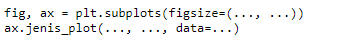

Berdasarkan templat tersebut, komponen utama untuk membuat visualisasi antara lain adalah tabel data, kolom data, serta bentuk geometri untuk mempresentasikan data. Sebagai contoh untuk membuat scatter-plot yang diperlukan adalah bentuk geometri titik (.scatter()), line-chart memerlukan geometri garis (.plot()), sedangkan bar-chart memerlukan bentuk geometri batang atau kolom (.bar()).

Lengkapi baris kode berikut untuk membuat bar-chart jumlah kasus baru harian COVID-19 di Jawa Barat menggunakan data cov_jabar_tidy! Pergunakan kolom tanggal sebagai sumbu-x.

Kondisi COVID19 di Jawa Barat hingga Oktober 2020

/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


<Figure size 432x288 with 0 Axes>

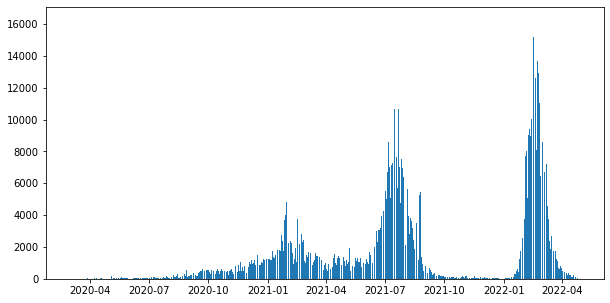

In [ ]:
import numpy as np
import pandas as pd
import requests
resp_jabar = requests.get('https://storage.googleapis.com/dqlab-dataset/prov_detail_JAWA_BARAT.json', verify=False)
cov_jabar_raw = resp_jabar.json()
cov_jabar = pd.DataFrame(cov_jabar_raw['list_perkembangan'])

cov_jabar_tidy = (cov_jabar.drop(columns=[item for item in cov_jabar.columns 
                                               if item.startswith('AKUMULASI') 
                                                  or item.startswith('DIRAWAT')])
                           .rename(columns=str.lower)
                           .rename(columns={'kasus': 'kasus_baru'})
                  )
cov_jabar_tidy['tanggal'] = pd.to_datetime(cov_jabar_tidy['tanggal']*1e6, unit='ns')

import matplotlib.pyplot as plt

plt.clf()
fig, ax = plt.subplots(figsize=(10,5))
ax.bar(data=cov_jabar_tidy, x='tanggal', height='kasus_baru')
plt.show()

## **Informasi pada Grafik**

Anda telah berhasil membuat bar-chart yang diminta. Namun grafik tersebut belum memiliki informasi yang jelas serta cenderung membosankan untuk dilihat. Sekarang silakan buat kembali grafik tersebut dengan menggunakan baris kode yang telah dimodifikasi berikut:

Bar chart ini menunjukkan kondisi kasus harian postif COVID19 di Jawab Barat hingga Oktober 2020

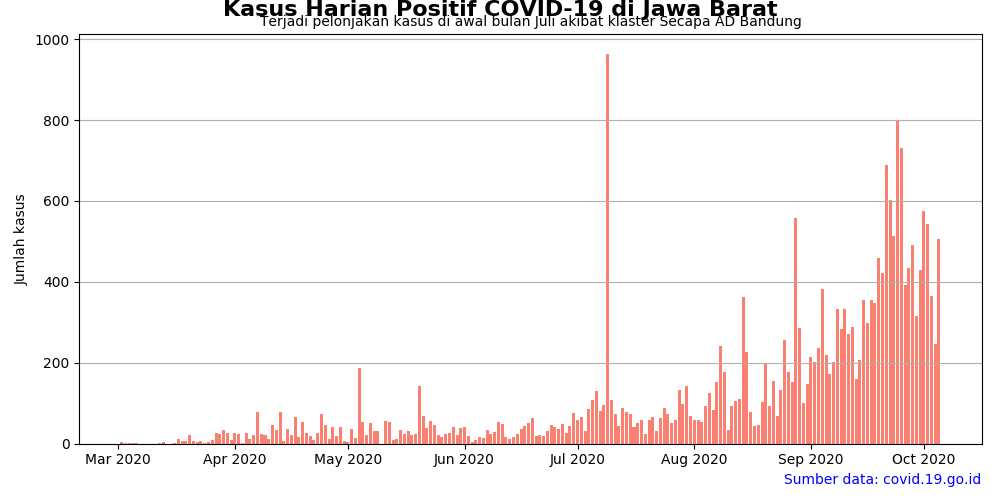

Sementara itu, kondisi di awal Juli 2021 diperlihatkan berikut ini

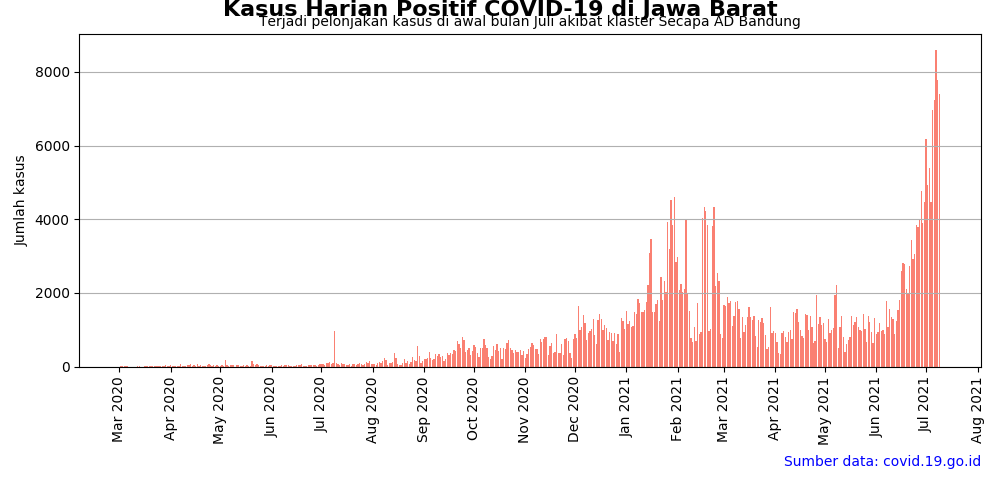

Apa yang dapat Anda pahami dari visualisasi data hingga data terakhir?

/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


<Figure size 432x288 with 0 Axes>

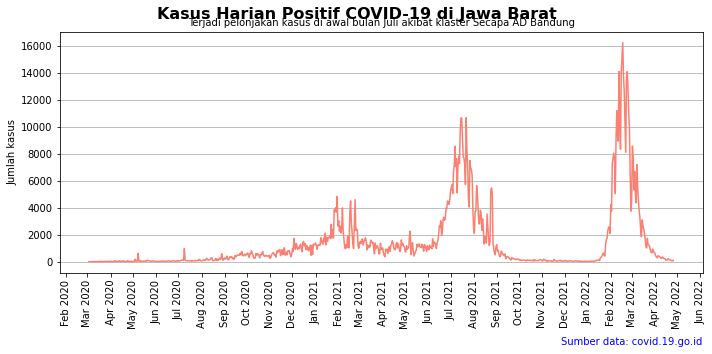

In [1]:
import numpy as np
import pandas as pd
import requests
resp_jabar = requests.get('https://storage.googleapis.com/dqlab-dataset/prov_detail_JAWA_BARAT.json', verify=False)
cov_jabar_raw = resp_jabar.json()
cov_jabar = pd.DataFrame(cov_jabar_raw['list_perkembangan'])

cov_jabar_tidy = (cov_jabar.drop(columns=[item for item in cov_jabar.columns 
                                               if item.startswith('AKUMULASI') 
                                                  or item.startswith('DIRAWAT')])
                           .rename(columns=str.lower)
                           .rename(columns={'kasus': 'kasus_baru'})
                  )
cov_jabar_tidy['tanggal'] = pd.to_datetime(cov_jabar_tidy['tanggal']*1e6, unit='ns')

import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.clf()
fig, ax = plt.subplots(figsize=(10,5))
ax.plot('tanggal', 'kasus_baru', data=cov_jabar_tidy, color='salmon')
fig.suptitle('Kasus Harian Positif COVID-19 di Jawa Barat', 
             y=1.00, fontsize=16, fontweight='bold', ha='center')
ax.set_title('Terjadi pelonjakan kasus di awal bulan Juli akibat klaster Secapa AD Bandung',
             fontsize=10)
ax.set_xlabel('')
ax.set_ylabel('Jumlah kasus')
ax.text(1, -0.3, 'Sumber data: covid.19.go.id', color='blue',
        ha='right', transform=ax.transAxes)
ax.set_xticklabels(ax.get_xticks(), rotation=90)

ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

plt.grid(axis='y')
plt.tight_layout()
plt.show()

## **Grafik untuk Kasus Sembuh**

Sekarang buatlah grafik serupa dengan menggunakan data kasus sembuh menggunakan warna olivedrab!

Untuk kasus harian sembuh dari COVID19 di Jawa Barat hingga Oktober 2020 ditunjukkan oleh grafik:

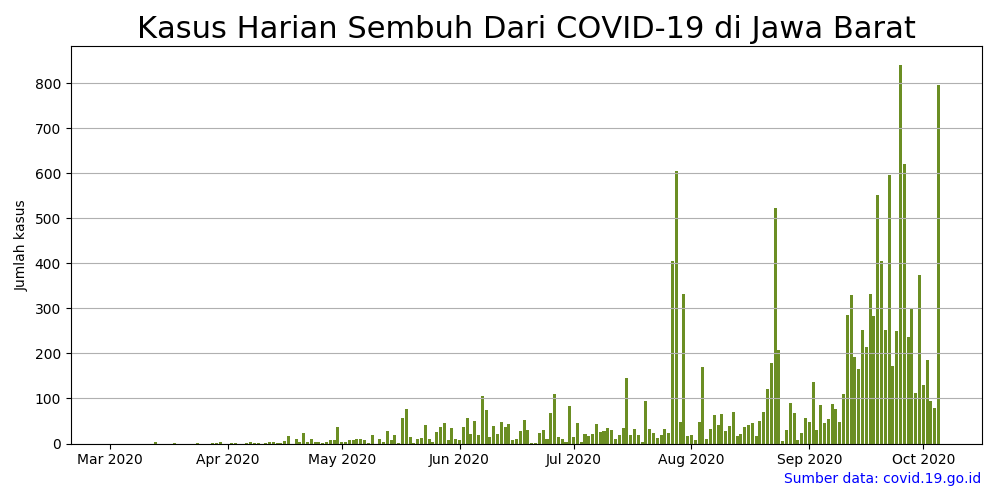

dan bagaimana perkembangannya hingga awal Juli 2021 ditunjukkan oleh grafik berikut ini

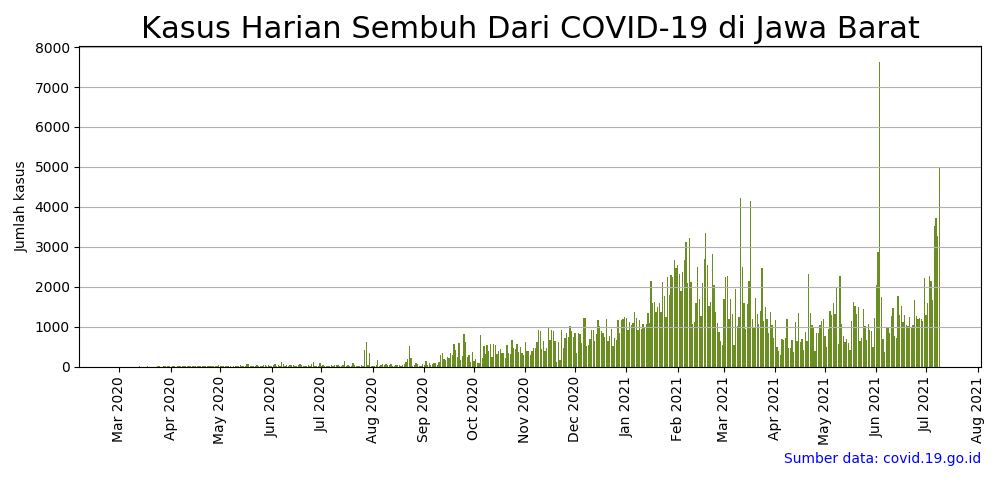

Hingga data terakhir, apa yang dapat Anda simpulkan?

/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


<Figure size 432x288 with 0 Axes>

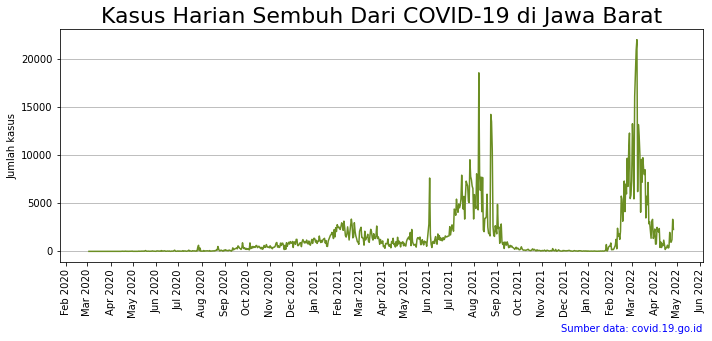

In [2]:
import numpy as np
import pandas as pd
import requests
resp_jabar = requests.get('https://storage.googleapis.com/dqlab-dataset/prov_detail_JAWA_BARAT.json', verify=False)
cov_jabar_raw = resp_jabar.json()
cov_jabar = pd.DataFrame(cov_jabar_raw['list_perkembangan'])

cov_jabar_tidy = (cov_jabar.drop(columns=[item for item in cov_jabar.columns 
                                               if item.startswith('AKUMULASI') 
                                                  or item.startswith('DIRAWAT')])
                           .rename(columns=str.lower)
                           .rename(columns={'kasus': 'kasus_baru'})
                  )
cov_jabar_tidy['tanggal'] = pd.to_datetime(cov_jabar_tidy['tanggal']*1e6, unit='ns')

import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.clf()
fig, ax = plt.subplots(figsize=(10,5))
ax.plot('tanggal', 'sembuh', data=cov_jabar_tidy, color='olivedrab')
ax.set_title('Kasus Harian Sembuh Dari COVID-19 di Jawa Barat',
             fontsize=22)
ax.set_xlabel('')
ax.set_ylabel('Jumlah kasus')
ax.text(1, -0.3, 'Sumber data: covid.19.go.id', color='blue',
        ha='right', transform=ax.transAxes)
ax.set_xticklabels(ax.get_xticks(), rotation=90)

ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

plt.grid(axis='y')
plt.tight_layout()
plt.show()

## **Grafik untuk Kasus Meninggal**

Sekarang buatlah grafik serupa dengan menggunakan data kasus meninggal menggunakan warna slategrey!

Berikut ini ditampilkan kondisi harian meninggal akibat COVID19 di Jawa Barat hingga Oktober 2020

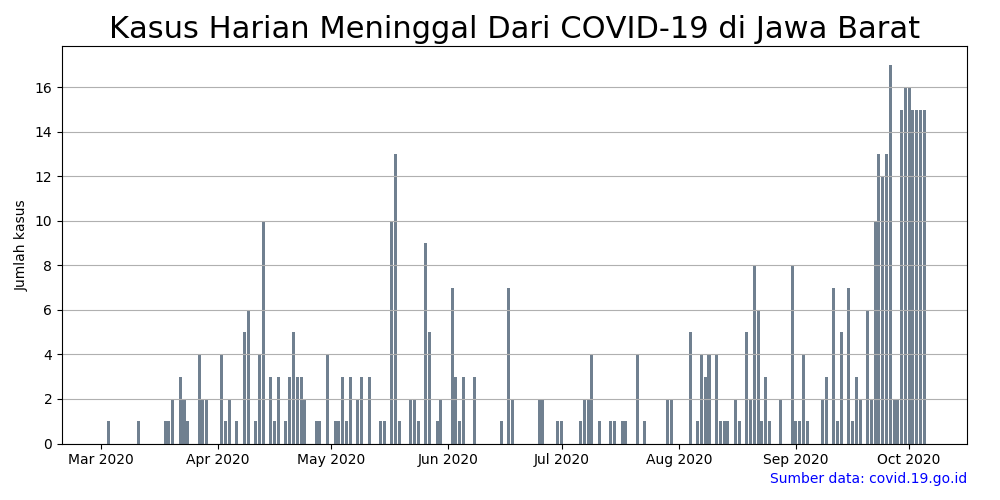

dan kondisi harian meninggal hingga awal Juli 2021 ditampilkan sebagai berikut

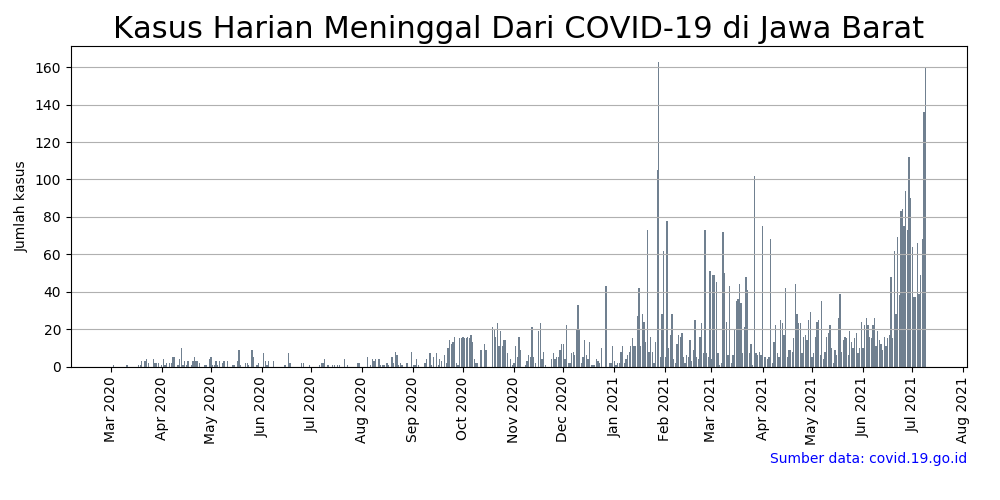

Bagaimanakah kasus harian meninggal dalam tahun 2022 ini hingga data terakhir?

/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


<Figure size 432x288 with 0 Axes>

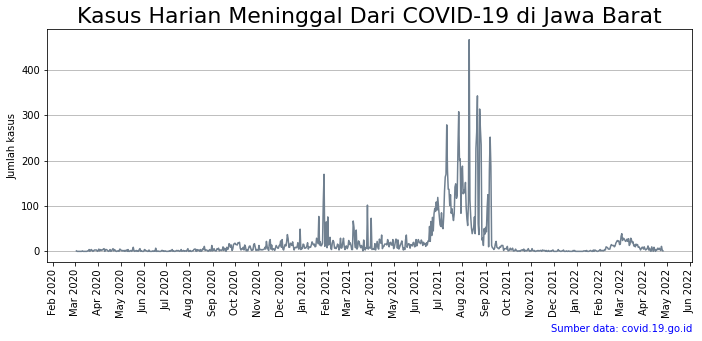

In [4]:
import numpy as np
import pandas as pd
import requests
resp_jabar = requests.get('https://storage.googleapis.com/dqlab-dataset/prov_detail_JAWA_BARAT.json', verify=False)
cov_jabar_raw = resp_jabar.json()
cov_jabar = pd.DataFrame(cov_jabar_raw['list_perkembangan'])

cov_jabar_tidy = (cov_jabar.drop(columns=[item for item in cov_jabar.columns 
                                               if item.startswith('AKUMULASI') 
                                                  or item.startswith('DIRAWAT')])
                           .rename(columns=str.lower)
                           .rename(columns={'kasus': 'kasus_baru'})
                  )
cov_jabar_tidy['tanggal'] = pd.to_datetime(cov_jabar_tidy['tanggal']*1e6, unit='ns')

import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.clf()
fig, ax = plt.subplots(figsize=(10,5))
ax.plot('tanggal', 'meninggal', data=cov_jabar_tidy, color='slategrey')
ax.set_title('Kasus Harian Meninggal Dari COVID-19 di Jawa Barat',
             fontsize=22)
ax.set_xlabel('')
ax.set_ylabel('Jumlah kasus')
ax.text(1, -0.3, 'Sumber data: covid.19.go.id', color='blue',
        ha='right', transform=ax.transAxes)
ax.set_xticklabels(ax.get_xticks(), rotation=90)

ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

plt.grid(axis='y')
plt.tight_layout()
plt.show()

## **Apakah Pekan ini Lebih Baik?**

Setelah mengamati grafik perkembangan kasus Anda menyadari bahwa terjadi fluktuasi pertambahan kasus harian. Dilandasi hal tersebut Anda kemudian ingin mencoba mengamati bagaimana perkembangan kasus dalam rentang waktu pekanan. Bagaimanakah caranya?

Anda dapat dengan mudah mengerjakannya Anda sudah dibantu melalui predefined code, yaitu set terlebih dahulu kolom tanggal pada cov_jabar_tidy sebagai index. Kemudian terapkan method pada time series di pandas, resampling per pekan dan gunakan agregasi penjumlahan. Adapun yang akan digunakan untuk mengekstrak informasi pekan dalam satu tahun adalah weekofyear dan year untuk tahun.

Lengkapilah baris kode berikut untuk menghitung pertambahan kasus pekanan dan simpanlah hasilnya sebagai cov_jabar_pekanan! Anda juga diminta untuk menggunakan method info() dan .head() untuk melakukan inspeksi data.

In [ ]:
import numpy as np
import pandas as pd
import requests
resp_jabar = requests.get('https://storage.googleapis.com/dqlab-dataset/prov_detail_JAWA_BARAT.json', verify=False)
cov_jabar_raw = resp_jabar.json()
cov_jabar = pd.DataFrame(cov_jabar_raw['list_perkembangan'])

cov_jabar_tidy = (cov_jabar.drop(columns=[item for item in cov_jabar.columns 
                                               if item.startswith('AKUMULASI') 
                                                  or item.startswith('DIRAWAT')])
                           .rename(columns=str.lower)
                           .rename(columns={'kasus': 'kasus_baru'})
                  )
cov_jabar_tidy['tanggal'] = pd.to_datetime(cov_jabar_tidy['tanggal']*1e6, unit='ns')

cov_jabar_pekanan = (cov_jabar_tidy.set_index('tanggal')['kasus_baru']
                                   .resample('W')
                                   .sum()
                                   .reset_index()
                                   .rename(columns={'kasus_baru': 'jumlah'})
                    )
cov_jabar_pekanan['tahun'] = cov_jabar_pekanan['tanggal'].apply(lambda x: x.year)
cov_jabar_pekanan['pekan_ke'] =cov_jabar_pekanan['tanggal'].apply(lambda x: x.weekofyear)
cov_jabar_pekanan = cov_jabar_pekanan[['tahun', 'pekan_ke', 'jumlah']]

print('Info cov_jabar_pekanan:')
print(cov_jabar_pekanan.info())
print('\nLima data teratas cov_jabar_pekanan:\n', cov_jabar_pekanan.head())

Info cov_jabar_pekanan:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113 entries, 0 to 112
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   tahun     113 non-null    int64
 1   pekan_ke  113 non-null    int64
 2   jumlah    113 non-null    int64
dtypes: int64(3)
memory usage: 2.8 KB
None

Lima data teratas cov_jabar_pekanan:
    tahun  pekan_ke  jumlah
0   2020        10       4
1   2020        11       5
2   2020        12      44
3   2020        13      80
4   2020        14      89


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


## **Menjawab Pertanyaan**

Pertanyaan baru muncul di benak Anda setelah melakukan inspeksi terhadap data cov_jabar_pekanan tersebut: "Apakah pekan ini lebih baik dari pekan kemarin?"

Demi menjawab hal tersebut Anda melakukan kalkulasi sederhana dengan tahapan berikut:

* Membuat kolom baru yang berisi jumlah kasus baru dalam satu pekan sebelumnya. Kolom ini diberi nama jumlah_pekanlalu.
* Mengganti nilai NaN pada kolom jumlah_pekanlalu dengan nilai 0
* Melakukan komparasi antara kolom jumlah dengan kolom jumlah_pekanlalu. Hasil komparasi ini disimpan dalam kolom baru dengan nama lebih_baik, isinya adalah True apabila jumlah kasus baru pekan ini lebih rendah dibandingkan jumlah kasus pekan lalu

Lengkapilah baris predefined kode yang diberikan untuk mengerjakan tahapan yang telah Anda rencanakan! Anda akan menggunakan method shift() untuk membuat kolom jumlah_pekanlalu. Inspeksi hasil pekerjaan Anda dengan menggunakan head(10)!

In [ ]:
import numpy as np
import pandas as pd
import requests
resp_jabar = requests.get('https://storage.googleapis.com/dqlab-dataset/prov_detail_JAWA_BARAT.json', verify=False)
cov_jabar_raw = resp_jabar.json()
cov_jabar = pd.DataFrame(cov_jabar_raw['list_perkembangan'])

cov_jabar_tidy = (cov_jabar.drop(columns=[item for item in cov_jabar.columns 
                                               if item.startswith('AKUMULASI') 
                                                  or item.startswith('DIRAWAT')])
                           .rename(columns=str.lower)
                           .rename(columns={'kasus': 'kasus_baru'})
                  )
cov_jabar_tidy['tanggal'] = pd.to_datetime(cov_jabar_tidy['tanggal']*1e6, unit='ns')

cov_jabar_pekanan = (cov_jabar_tidy.set_index('tanggal')['kasus_baru']
                                   .resample('W')
                                   .sum()
                                   .reset_index()
                                   .rename(columns={'kasus_baru': 'jumlah'})
                    )
cov_jabar_pekanan['tahun'] = cov_jabar_pekanan['tanggal'].apply(lambda x: x.year)
cov_jabar_pekanan['pekan_ke'] = cov_jabar_pekanan['tanggal'].apply(lambda x: x.weekofyear)
cov_jabar_pekanan = cov_jabar_pekanan[['tahun', 'pekan_ke', 'jumlah']]

cov_jabar_pekanan['jumlah_pekanlalu'] = cov_jabar_pekanan['jumlah'].shift().replace(np.nan, 0).astype(np.int)
cov_jabar_pekanan['lebih_baik'] = cov_jabar_pekanan['jumlah'] < cov_jabar_pekanan['jumlah_pekanlalu']

print('Sepuluh data teratas:\n', cov_jabar_pekanan.head(10))

Sepuluh data teratas:
    tahun  pekan_ke  jumlah  jumlah_pekanlalu  lebih_baik
0   2020        10       4                 0       False
1   2020        11       5                 4       False
2   2020        12      44                 5       False
3   2020        13      80                44       False
4   2020        14      89                80       False
5   2020        15     176                89       False
6   2020        16     203               176       False
7   2020        17     136               203        True
8   2020        18     100               136        True
9   2020        19     914               100       False


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


## **Membuat Bar Chart**

Anda sungguh luar biasa! Dengan menggunakan data hasil perhitungan tersebut maka sekarang Anda dapat membuat bar-chat penambahan kasus pekanan yang ditambahkan informasi baru untuk menjawab pertanyaan: "Apakah pekan ini lebih baik?"

Salin dan jalankan kode berikut di konsol Anda!

/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


<Figure size 432x288 with 0 Axes>

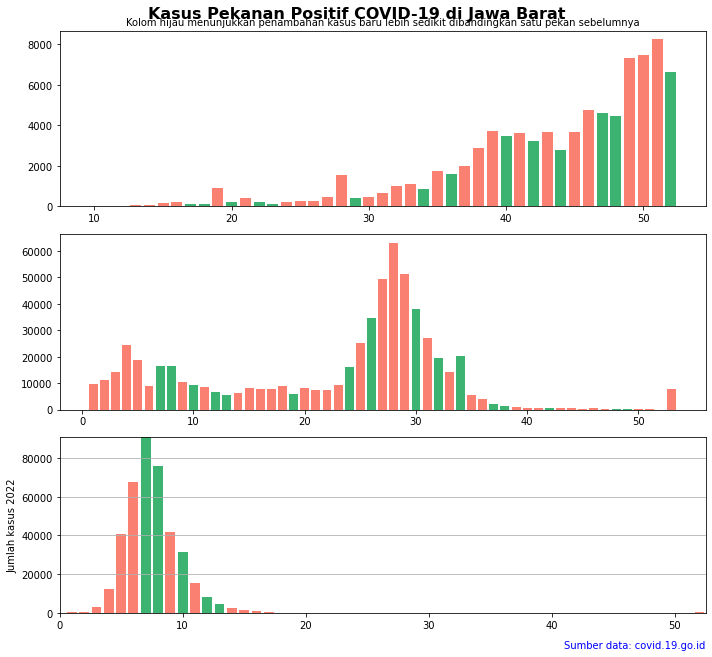

In [ ]:
import numpy as np
import pandas as pd
import requests
resp_jabar = requests.get('https://storage.googleapis.com/dqlab-dataset/prov_detail_JAWA_BARAT.json', verify=False)
cov_jabar_raw = resp_jabar.json()
cov_jabar = pd.DataFrame(cov_jabar_raw['list_perkembangan'])

cov_jabar_tidy = (cov_jabar.drop(columns=[item for item in cov_jabar.columns 
                                               if item.startswith('AKUMULASI') 
                                                  or item.startswith('DIRAWAT')])
                           .rename(columns=str.lower)
                           .rename(columns={'kasus': 'kasus_baru'})
                  )
cov_jabar_tidy['tanggal'] = pd.to_datetime(cov_jabar_tidy['tanggal']*1e6, unit='ns')

cov_jabar_pekanan = (cov_jabar_tidy.set_index('tanggal')['kasus_baru']
                                   .resample('W')
                                   .sum()
                                   .reset_index()
                                   .rename(columns={'kasus_baru': 'jumlah'})
                    )
cov_jabar_pekanan['tahun'] = cov_jabar_pekanan['tanggal'].apply(lambda x: x.year)
cov_jabar_pekanan['pekan_ke'] = cov_jabar_pekanan['tanggal'].apply(lambda x: x.weekofyear)
cov_jabar_pekanan = cov_jabar_pekanan[['tahun', 'pekan_ke', 'jumlah']]

cov_jabar_pekanan['jumlah_pekanlalu'] = cov_jabar_pekanan['jumlah'].shift().replace(np.nan, 0).astype(np.int)
cov_jabar_pekanan['lebih_baik'] = cov_jabar_pekanan['jumlah'] < cov_jabar_pekanan['jumlah_pekanlalu']

import matplotlib.pyplot as plt

plt.clf()
jml_tahun_terjadi_covid19 = cov_jabar_pekanan['tahun'].nunique()
tahun_terjadi_covid19 = cov_jabar_pekanan['tahun'].unique()
fig, axes = plt.subplots(nrows = jml_tahun_terjadi_covid19,
            figsize = (10,3*jml_tahun_terjadi_covid19))

fig.suptitle('Kasus Pekanan Positif COVID-19 di Jawa Barat',
      y = 1.00, fontsize = 16, fontweight = 'bold', ha = 'center')
for i, ax in enumerate(axes):
 ax.bar(data=cov_jabar_pekanan.loc[cov_jabar_pekanan['tahun']==tahun_terjadi_covid19[i]],
      x = 'pekan_ke', height = 'jumlah',
      color = ['mediumseagreen' if x is True else 'salmon'
          for x in cov_jabar_pekanan['lebih_baik']])
 if i == 0:
    ax.set_title('Kolom hijau menunjukkan penambahan kasus baru lebih sedikit dibandingkan satu pekan sebelumnya',
      fontsize = 10)
 elif i == jml_tahun_terjadi_covid19-1:
  ax.text(1, -0.2, 'Sumber data: covid.19.go.id', color='blue',
      ha = 'right', transform = ax.transAxes)

  ax.set_xlim([0, 52.5])
  ax.set_ylim([0, max(cov_jabar_pekanan['jumlah'])])
  ax.set_xlabel('')
  ax.set_ylabel('Jumlah kasus %d'%(tahun_terjadi_covid19[i],))
  ax.grid(axis='y')

plt.tight_layout()
plt.show()

## **Pola dan Dinamika**

Ada yang akhirnya sembuh, namun tak sedikit pula yang meninggal akibat COVID-19. Sementara itu penambahan kasus baru terus terjadi di masyarakat. Hal ini mungkin memicu pertanyaan lain di diri Anda: "Hingga saat ini ada berapa kasus yang masih aktif?"

Aktif dalam artian sedang dalam perawatan atau isolasi.

Informasi ini sebenarnya telah disediakan di dalam respon API covid19.go.id yang Anda minta (https://storage.googleapis.com/dqlab-dataset/prov_detail_JAWA_BARAT.json). Namun tidak ada salahnya jika Anda mencoba menghitungnya sendiri, apakah Anda setuju?

Jumlah kasus aktif dapat dihitung dengan cara mengurangi jumlah akumulasi positif dengan jumlah akumulasi sembuh dan jumlah akumulasi meninggal. Anda dapat menggunakan method cumsum() untuk menghitung nilai akumulasi dari suatu vektor numerik. Lengkapilah baris kode berikut untuk menghitung jumlah akumulasi kasus aktif, kasus sembuh, dan kasus meninggal!

In [ ]:
import numpy as np
import pandas as pd
import requests
resp_jabar = requests.get('https://storage.googleapis.com/dqlab-dataset/prov_detail_JAWA_BARAT.json', verify=False)
cov_jabar_raw = resp_jabar.json()
cov_jabar = pd.DataFrame(cov_jabar_raw['list_perkembangan'])

cov_jabar_tidy = (cov_jabar.drop(columns=[item for item in cov_jabar.columns 
                                               if item.startswith('AKUMULASI') 
                                                  or item.startswith('DIRAWAT')])
                           .rename(columns=str.lower)
                           .rename(columns={'kasus': 'kasus_baru'})
                  )
cov_jabar_tidy['tanggal'] = pd.to_datetime(cov_jabar_tidy['tanggal']*1e6, unit='ns')

cov_jabar_akumulasi = cov_jabar_tidy[['tanggal']].copy()
cov_jabar_akumulasi['akumulasi_aktif'] = (cov_jabar_tidy['kasus_baru'] - cov_jabar_tidy['sembuh'] - cov_jabar_tidy['meninggal']).cumsum()
cov_jabar_akumulasi['akumulasi_sembuh'] = cov_jabar_tidy['sembuh'].cumsum()
cov_jabar_akumulasi['akumulasi_meninggal'] = cov_jabar_tidy['meninggal'].cumsum()
print(cov_jabar_akumulasi.tail())

       tanggal  akumulasi_aktif  akumulasi_sembuh  akumulasi_meninggal
780 2022-04-22            10753           1078344                15735
781 2022-04-23             9882           1079297                15737
782 2022-04-24             8709           1080519                15748
783 2022-04-25             5428           1083851                15751
784 2022-04-26             3253           1086129                15752


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


## **Membuat Line Chart**

Sekarang cobalah Anda buat line-chart pola kasus aktif dengan menggunakan method plot pada ax

Akumulasi COVID19 hingga Oktober 2020

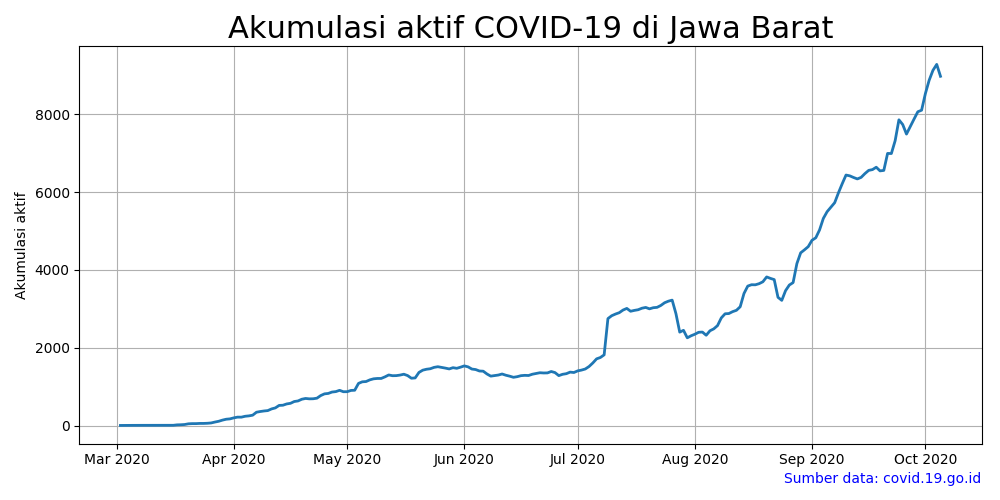

Sementara itu, untuk akumulasi aktif hingga awal Juli 2021

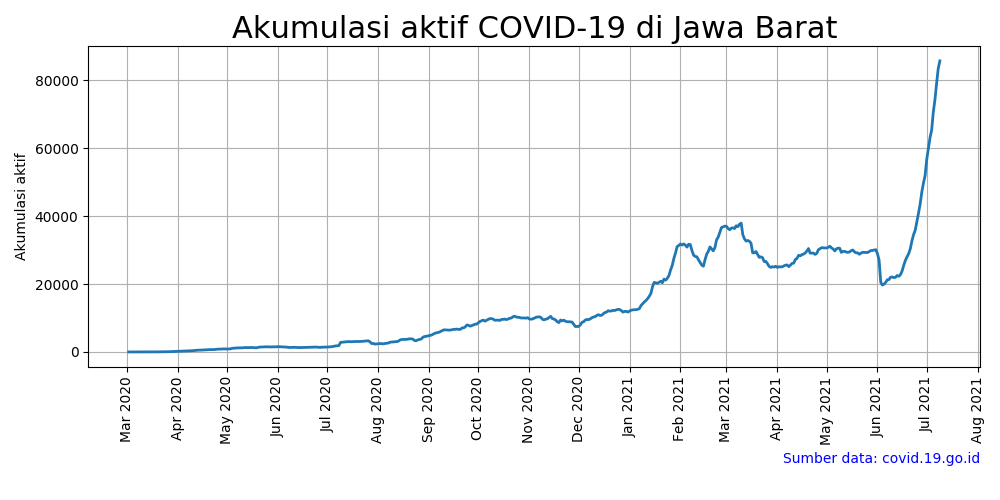

Bagaimanakah akumulasi COVID19 hingga data terakhir yang dimiliki?

/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


<Figure size 432x288 with 0 Axes>

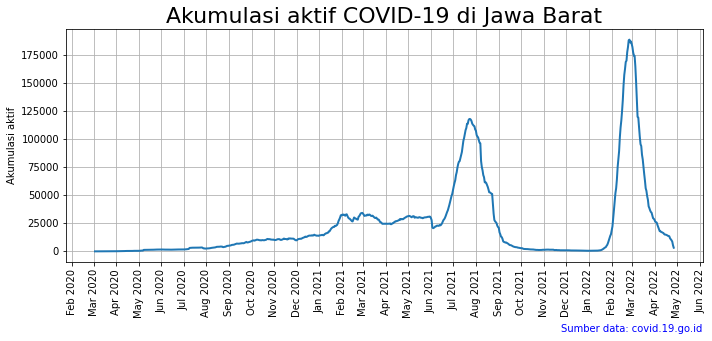

In [ ]:
import numpy as np
import pandas as pd
import requests
resp_jabar = requests.get('https://storage.googleapis.com/dqlab-dataset/prov_detail_JAWA_BARAT.json', verify=False)
cov_jabar_raw = resp_jabar.json()
cov_jabar = pd.DataFrame(cov_jabar_raw['list_perkembangan'])

cov_jabar_tidy = (cov_jabar.drop(columns=[item for item in cov_jabar.columns 
                                               if item.startswith('AKUMULASI') 
                                                  or item.startswith('DIRAWAT')])
                           .rename(columns=str.lower)
                           .rename(columns={'kasus': 'kasus_baru'})
                  )
cov_jabar_tidy['tanggal'] = pd.to_datetime(cov_jabar_tidy['tanggal']*1e6, unit='ns')

cov_jabar_akumulasi = cov_jabar_tidy[['tanggal']].copy()
cov_jabar_akumulasi['akumulasi_aktif'] = (cov_jabar_tidy['kasus_baru'] - cov_jabar_tidy['sembuh'] - cov_jabar_tidy['meninggal']).cumsum()
cov_jabar_akumulasi['akumulasi_sembuh'] = cov_jabar_tidy['sembuh'].cumsum()
cov_jabar_akumulasi['akumulasi_meninggal'] = cov_jabar_tidy['meninggal'].cumsum()

import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.clf()
fig, ax = plt.subplots(figsize=(10,5))
ax.plot('tanggal', 'akumulasi_aktif', data=cov_jabar_akumulasi, lw=2)

ax.set_title('Akumulasi aktif COVID-19 di Jawa Barat',
             fontsize=22)
ax.set_xlabel('')
ax.set_ylabel('Akumulasi aktif')
ax.text(1, -0.3, 'Sumber data: covid.19.go.id', color='blue',
        ha='right', transform=ax.transAxes)
ax.set_xticklabels(ax.get_xticks(), rotation=90)

ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

plt.grid()
plt.tight_layout()
plt.show()

## **Kabar Buruk dan Kabar Baik**
Sebagai penutup analisis dalam proyek ini Anda diminta untuk membuat grafik komparasi antara akumulasi kasus aktif, kasus sembuh, dan kasus meninggal.

Ada dua pilihan cara yang dapat Anda tempuh untuk membuat grafik tersebut:

1. Menggunakan data frame cov_jabar_akumulasi, dengan kolom bertipe datetime diset menjadi index sehingga kita memiliki time series dataframe. Kemudian kita secara langsung dapat melakukan line plot dan memilih warna garis yang sesuai untuk membedakan; atau
2. Menggunakan ax.plot() dan mengisikan kolom-kolom yang masing-masingnya menjadi x dan y dengan data=cov_jabar_akumulasi, dan kemudian menset warna berbeda untuk ketiga line plot.

Anda akan diminta untuk menempuh cara nomor 1. Ketik True pada konsol jika Anda setuju!

In [ ]:
True

True

## **Tahap Terakhir**

Anda hampir selesai! Pada tahap terakhir ini Anda cukup salin dan jalankan baris kode berikut di konsol untuk membuat grafik komparasi antara akumulasi kasus aktif, kasus sembuh dan kasus meninggal:

/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


<Figure size 432x288 with 0 Axes>

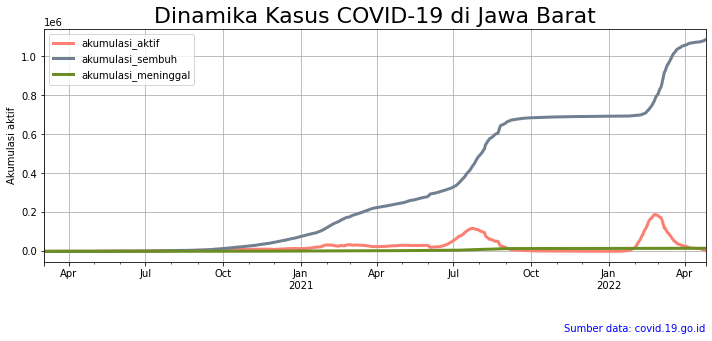

In [ ]:
import numpy as np
import pandas as pd
import requests
resp_jabar = requests.get('https://storage.googleapis.com/dqlab-dataset/prov_detail_JAWA_BARAT.json', verify=False)
cov_jabar_raw = resp_jabar.json()
cov_jabar = pd.DataFrame(cov_jabar_raw['list_perkembangan'])

cov_jabar_tidy = (cov_jabar.drop(columns=[item for item in cov_jabar.columns 
                                               if item.startswith('AKUMULASI') 
                                                  or item.startswith('DIRAWAT')])
                           .rename(columns=str.lower)
                           .rename(columns={'kasus': 'kasus_baru'})
                  )
cov_jabar_tidy['tanggal'] = pd.to_datetime(cov_jabar_tidy['tanggal']*1e6, unit='ns')

cov_jabar_akumulasi = cov_jabar_tidy[['tanggal']].copy()
cov_jabar_akumulasi['akumulasi_aktif'] = (cov_jabar_tidy['kasus_baru'] - cov_jabar_tidy['sembuh'] - cov_jabar_tidy['meninggal']).cumsum()
cov_jabar_akumulasi['akumulasi_sembuh'] = cov_jabar_tidy['sembuh'].cumsum()
cov_jabar_akumulasi['akumulasi_meninggal'] = cov_jabar_tidy['meninggal'].cumsum()

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
plt.clf()
fig, ax = plt.subplots(figsize=(10,5))
cov_jabar_akumulasi_ts = cov_jabar_akumulasi.set_index('tanggal')
cov_jabar_akumulasi_ts.plot(kind='line', ax=ax, lw=3,
							color=['salmon', 'slategrey', 'olivedrab'])
ax.set_title('Dinamika Kasus COVID-19 di Jawa Barat', 
			 fontsize=22)
ax.set_xlabel('')
ax.set_ylabel('Akumulasi aktif')
ax.text(1, -0.3, 'Sumber data: covid.19.go.id', color='blue',
		ha='right', transform=ax.transAxes)


plt.grid()
plt.tight_layout()
plt.show()

## **Kesimpulan & Penutup**
Selamat Anda telah menyelesaikan proyek analisis COVID-19 ini! Anda telah berhasil melakukan impor data melalui API, melakukan transformasi data, serta membuat visualisasi untuk mengkomunikasikan hasil analisis data tentang COVID-19. Anda dipersilakan untuk selanjutnya mengembangkan analisis dengan cara mengambil studi kasus provinsi lain atau bahkan melakukan komparasi antar provinsi.

Dengan berhasilnya Anda menyelesaikan proyek analisis ini, semoga Anda tetap sehat, waspada dan tetap tenang dalam menghadapi pandemi COVID-19. Selamat dan sukses selalu!